In [3]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
pd.set_option('display.max_rows', 1000)

In [4]:
# Create a path to the csv and read it into a Pandas DataFrame
#csv_path = "Assessor_Historical_Secured_Property_Tax_Rolls.csv"
csv_path = "Assessor_Historical_Secured_Property_Tax_Rolls (1).csv"

home_df = pd.read_csv(csv_path, encoding='utf8', engine='python')

home_df.head()

Closed Roll Year                     Property Location Parcel Number  \
0            2007.0  0000 0200 BRANNAN             ST0436       3774412   
1            2016.0  0000 1207 INDIANA             ST0004       4228041   
2            2010.0  0000 0383 SITUS TO BE ASSIGNEDST0000       0041102   
3            2007.0  0000 0708 NORTH POINT         STT  1       0024038   
4            2016.0  0000 0188 MARY TERESA         ST0000      5054A152   

   Block  Lot  Volume Number Use Code             Use Definition  \
0   3774  412             25     SRES  Single Family Residential   
1   4228  041             27     SRES  Single Family Residential   
2   0041  102              1     COMR          Commercial Retail   
3   0024  038              1     SRES  Single Family Residential   
4  5054A  152             30     SRES  Single Family Residential   

  Property Class Code Property Class Code Definition        ...         \
0                   Z                    Condominium        ...          
1                   Z                    Condominium        ...          
2                   C              Commercial Stores        ...          
3                   Z                    Condominium        ...          
4                   D                       Dwelling        ...          

   Assessed Improvement Value  Assessed Land Value  \
0                    660074.0             660074.0   
1                    448902.0             448902.0   
2                    643682.0            1396687.0   
3                    365523.0             365523.0   
4                    255843.0             383764.0   

   Assessed Personal Property Value  Assessor Neighborhood District  \
0                               0.0                             9.0   
1                               0.0                             9.0   
2                               0.0                             8.0   
3                               0.0                             8.0   
4                               0.0                            10.0   

   Assessor Neighborhood Code  Assessor Neighborhood Supervisor District  \
0                          9H            South Beach                   6   
1                          9E           Potrero Hill                  10   
2                          8D            North Beach                   3   
3                          8E           Russian Hill                   2   
4                         10K        Bayview Heights                  10   

            Analysis Neighborhood                              the_geom  \
0  Financial District/South Beach  (37.783600301443, -122.390711686202)   
1                    Potrero Hill   (37.75482032723, -122.390407823087)   
2                     North Beach  (37.805391366593, -122.413327689424)   
3                    Russian Hill  (37.806098058572, -122.419076819471)   
4           Bayview Hunters Point  (37.713888461234, -122.399170485325)   

             Row ID  
0   200701013774412  
1   201601014228041  
2   201001010041102  
3   200701010024038  
4  201601015054A152  

[5 rows x 47 columns]

In [3]:
home_df["Assessor Neighborhood"].value_counts()

Inner Mission                    73016
Central Sunset                   59401
Noe Valley                       58623
Excelsior                        56221
Parkside                         56196
Russian Hill                     55244
Central Richmond                 52306
Pacific Heights                  51103
Potrero Hill                     49147
South of Market                  47829
Outer Parkside                   47080
Bayview                          44827
Outer Sunset                     44103
Outer Richmond                   44008
Downtown                         43955
Yerba Buena                      43875
Inner Sunset                     41305
Van Ness/ Civic Center           40854
Eureka Valley/Dolores Heights    39898
Portola                          38865
Visitacion Valley                38721
South Beach                      36613
Mission Bay                      35269
Inner Richmond                   35153
Union Square                     31673
Croker Amazon            

In [5]:
neigh_gb = home_df.groupby(['Assessor Neighborhood','Closed Roll Year']).mean()
combined_df = neigh_gb.reset_index()

In [6]:
combined_df.keys()

Index(['Assessor Neighborhood', 'Closed Roll Year', 'Volume Number',
       'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms',
       'Number of Rooms', 'Number of Stories', 'Number of Units', 'Lot Depth',
       'Lot Frontage', 'Property Area', 'Basement Area', 'Lot Area',
       'Document Number 2', 'Tax Rate Area Code', 'Percent of Ownership',
       'Misc Exemption Value', 'Homeowner Exemption Value',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value',
       'Assessor Neighborhood District', 'Supervisor District'],
      dtype='object')

In [7]:

combined_df = combined_df[['Assessor Neighborhood','Closed Roll Year','Assessed Land Value']]
combined_df["Pct Change"] = 0
#,'Closed Roll Year','Assessed Land Value'

In [7]:
combined_df

Assessor Neighborhood  Closed Roll Year  Assessed Land Value  \
0                     Alamo Square            2007.0         3.562759e+05   
1                     Alamo Square            2008.0         3.847017e+05   
2                     Alamo Square            2009.0         3.991533e+05   
3                     Alamo Square            2010.0         4.118134e+05   
4                     Alamo Square            2011.0         4.253846e+05   
5                     Alamo Square            2012.0         4.467023e+05   
6                     Alamo Square            2013.0         4.649209e+05   
7                     Alamo Square            2014.0         4.808897e+05   
8                     Alamo Square            2015.0         5.117352e+05   
9                     Alamo Square            2016.0         5.415907e+05   
10                      Anza Vista            2007.0         2.497599e+05   
11                      Anza Vista            2008.0         3.216159e+05   
12                      Anza Vista            2009.0         3.311711e+05   
13                      Anza Vista            2010.0         3.506787e+05   
14                      Anza Vista            2011.0         3.624503e+05   
15                      Anza Vista            2012.0         3.727760e+05   
16                      Anza Vista            2013.0         3.684672e+05   
17                      Anza Vista            2014.0         3.957488e+05   
18                      Anza Vista            2015.0         4.041922e+05   
19                      Anza Vista            2016.0         4.470364e+05   
20                  Balboa Terrace            2007.0         3.084130e+05   
21                  Balboa Terrace            2008.0         3.416525e+05   
22                  Balboa Terrace            2009.0         3.715212e+05   
23                  Balboa Terrace            2010.0         3.716584e+05   
24                  Balboa Terrace            2011.0         3.930229e+05   
25                  Balboa Terrace            2012.0         4.011771e+05   
26                  Balboa Terrace            2013.0         4.029636e+05   
27                  Balboa Terrace            2014.0         4.388199e+05   
28                  Balboa Terrace            2015.0         4.748282e+05   
29                  Balboa Terrace            2016.0         5.071518e+05   
30                         Bayview            2007.0         1.810969e+05   
31                         Bayview            2008.0         1.923966e+05   
32                         Bayview            2009.0         2.108005e+05   
33                         Bayview            2010.0         2.148963e+05   
34                         Bayview            2011.0         2.245481e+05   
35                         Bayview            2012.0         2.214548e+05   
36                         Bayview            2013.0         2.331516e+05   
37                         Bayview            2014.0         2.421120e+05   
38                         Bayview            2015.0         2.583760e+05   
39                         Bayview            2016.0         2.758663e+05   
40                 Bayview Heights            2007.0         1.281575e+05   
41                 Bayview Heights            2008.0         1.361292e+05   
42                 Bayview Heights            2009.0         1.373861e+05   
43                 Bayview Heights            2010.0         1.394080e+05   
44                 Bayview Heights            2011.0         1.400042e+05   
45                 Bayview Heights            2012.0         1.530469e+05   
46                 Bayview Heights            2013.0         1.589030e+05   
47                 Bayview Heights            2014.0         1.610867e+05   
48                 Bayview Heights            2015.0         1.708197e+05   
49                 Bayview Heights            2016.0         1.800439e+05   
50                  Bernal Heights            2007.0         1.867749e+05   
51       

In [9]:
prev_neigh = "Beginning"
prev_value = 0

for index, county in combined_df.iterrows():
    #print(f'{index}')
    if county['Assessor Neighborhood'] != prev_neigh:
        print(f"{county['Assessor Neighborhood']} {county['Assessed Land Value']} previous = {prev_neigh} 0" )
        prev_neigh = county['Assessor Neighborhood']
        prev_value = county['Assessed Land Value']
        combined_df.loc[index, "Pct Change"] = 0
    else:
        print(f"{county['Assessor Neighborhood']} {county['Assessed Land Value']} previous = {prev_neigh} {prev_value}" )     
        change_pct = ((county['Assessed Land Value'] - prev_value) / prev_value * 100)
        print(f"{int(county['Closed Roll Year'])}: {change_pct:.2f}%")
        combined_df.loc[index, "Pct Change"] = round(change_pct,2)
        prev_neigh = county['Assessor Neighborhood']
        prev_value = county['Assessed Land Value']

Alamo Square 356275.88019966724 previous = Beginning 0
Alamo Square 384701.68595041323 previous = Alamo Square 356275.88019966724
2008: 7.98%
Alamo Square 399153.25611745514 previous = Alamo Square 384701.68595041323
2009: 3.76%
Alamo Square 411813.4324324324 previous = Alamo Square 399153.25611745514
2010: 3.17%
Alamo Square 425384.557844691 previous = Alamo Square 411813.4324324324
2011: 3.30%
Alamo Square 446702.2627388535 previous = Alamo Square 425384.557844691
2012: 5.01%
Alamo Square 464920.92846034217 previous = Alamo Square 446702.2627388535
2013: 4.08%
Alamo Square 480889.71927162365 previous = Alamo Square 464920.92846034217
2014: 3.43%
Alamo Square 511735.1915535445 previous = Alamo Square 480889.71927162365
2015: 6.41%
Alamo Square 541590.723880597 previous = Alamo Square 511735.1915535445
2016: 5.83%
Anza Vista 249759.90945674045 previous = Alamo Square 0
Anza Vista 321615.8537074148 previous = Anza Vista 249759.90945674045
2008: 28.77%
Anza Vista 331171.11706349207 previ

Forest Knolls 283995.83269961976 previous = Forest Knolls 247007.47338403043
2008: 14.97%
Forest Knolls 301677.92395437264 previous = Forest Knolls 283995.83269961976
2009: 6.23%
Forest Knolls 317105.1330798479 previous = Forest Knolls 301677.92395437264
2010: 5.11%
Forest Knolls 333460.0551330798 previous = Forest Knolls 317105.1330798479
2011: 5.16%
Forest Knolls 352654.7661596958 previous = Forest Knolls 333460.0551330798
2012: 5.76%
Forest Knolls 368382.4049429658 previous = Forest Knolls 352654.7661596958
2013: 4.46%
Forest Knolls 386308.27376425854 previous = Forest Knolls 368382.4049429658
2014: 4.87%
Forest Knolls 436464.94696969696 previous = Forest Knolls 386308.27376425854
2015: 12.98%
Forest Knolls 458681.98295454547 previous = Forest Knolls 436464.94696969696
2016: 5.09%
Glen Park 222703.16558068225 previous = Forest Knolls 0
Glen Park 249422.46846153846 previous = Glen Park 222703.16558068225
2008: 12.00%
Glen Park 260265.16945288755 previous = Glen Park 249422.4684615384

Lower Pacific Heights 467876.8123076923 previous = Lower Pacific Heights 464476.03886925796
2016: 0.73%
Marina 417058.44953789277 previous = Lower Pacific Heights 0
Marina 457094.15845588234 previous = Marina 417058.44953789277
2008: 9.60%
Marina 498067.8305830583 previous = Marina 457094.15845588234
2009: 8.96%
Marina 510889.51262349065 previous = Marina 498067.8305830583
2010: 2.57%
Marina 522087.52851434797 previous = Marina 510889.51262349065
2011: 2.19%
Marina 551994.8401310998 previous = Marina 522087.52851434797
2012: 5.73%
Marina 575636.1819164265 previous = Marina 551994.8401310998
2013: 4.28%
Marina 605052.6868940754 previous = Marina 575636.1819164265
2014: 5.11%
Marina 646166.9171724385 previous = Marina 605052.6868940754
2015: 6.80%
Marina 682746.0530222694 previous = Marina 646166.9171724385
2016: 5.66%
Merced Heights 145706.93756194253 previous = Marina 0
Merced Heights 153802.2418235877 previous = Merced Heights 145706.93756194253
2008: 5.56%
Merced Heights 156488.13379

North Waterfront 673014.7569269522 previous = North Waterfront 707188.8119777159
2009: -4.83%
North Waterfront 734617.9569620253 previous = North Waterfront 673014.7569269522
2010: 9.15%
North Waterfront 867270.2109704642 previous = North Waterfront 734617.9569620253
2011: 18.06%
North Waterfront 791237.8860759494 previous = North Waterfront 867270.2109704642
2012: -8.77%
North Waterfront 840680.3658227848 previous = North Waterfront 791237.8860759494
2013: 6.25%
North Waterfront 898735.4734177216 previous = North Waterfront 840680.3658227848
2014: 6.91%
North Waterfront 953461.6493670886 previous = North Waterfront 898735.4734177216
2015: 6.09%
North Waterfront 1007685.7742749054 previous = North Waterfront 953461.6493670886
2016: 5.69%
Oceanview 152415.27805178793 previous = North Waterfront 0
Oceanview 166156.036877689 previous = Oceanview 152415.27805178793
2008: 9.02%
Oceanview 165018.15313653136 previous = Oceanview 166156.036877689
2009: -0.68%
Oceanview 168846.56265356267 previ

Stonestown 1693961.0902934538 previous = Stonestown 2310281.204968944
2014: -26.68%
Stonestown 1446393.8246268656 previous = Stonestown 1693961.0902934538
2015: -14.61%
Stonestown 1553429.621414914 previous = Stonestown 1446393.8246268656
2016: 7.40%
Sunnyside 175818.58480894688 previous = Stonestown 0
Sunnyside 189017.77958993477 previous = Sunnyside 175818.58480894688
2008: 7.51%
Sunnyside 196821.35740913328 previous = Sunnyside 189017.77958993477
2009: 4.13%
Sunnyside 197144.0656424581 previous = Sunnyside 196821.35740913328
2010: 0.16%
Sunnyside 204617.59897769516 previous = Sunnyside 197144.0656424581
2011: 3.79%
Sunnyside 216828.88377498838 previous = Sunnyside 204617.59897769516
2012: 5.97%
Sunnyside 219875.82025081283 previous = Sunnyside 216828.88377498838
2013: 1.41%
Sunnyside 232861.30436802973 previous = Sunnyside 219875.82025081283
2014: 5.91%
Sunnyside 254771.7558031569 previous = Sunnyside 232861.30436802973
2015: 9.41%
Sunnyside 271672.85415699024 previous = Sunnyside 2

In [11]:
#combined.to_csv('combine.csv', sep=',', encoding='utf-8')

combined_df.to_csv('combine.csv', sep=',', encoding='utf-8')

In [11]:
combined_df['Closed Roll Year'] = combined_df['Closed Roll Year'].astype(int)
combined_df['Pct Change'] = combined_df['Pct Change'].astype(float)
combined_df

Assessor Neighborhood  Closed Roll Year  Assessed Land Value  \
0                     Alamo Square              2007         3.562759e+05   
1                     Alamo Square              2008         3.847017e+05   
2                     Alamo Square              2009         3.991533e+05   
3                     Alamo Square              2010         4.118134e+05   
4                     Alamo Square              2011         4.253846e+05   
5                     Alamo Square              2012         4.467023e+05   
6                     Alamo Square              2013         4.649209e+05   
7                     Alamo Square              2014         4.808897e+05   
8                     Alamo Square              2015         5.117352e+05   
9                     Alamo Square              2016         5.415907e+05   
10                      Anza Vista              2007         2.497599e+05   
11                      Anza Vista              2008         3.216159e+05   
12                      Anza Vista              2009         3.311711e+05   
13                      Anza Vista              2010         3.506787e+05   
14                      Anza Vista              2011         3.624503e+05   
15                      Anza Vista              2012         3.727760e+05   
16                      Anza Vista              2013         3.684672e+05   
17                      Anza Vista              2014         3.957488e+05   
18                      Anza Vista              2015         4.041922e+05   
19                      Anza Vista              2016         4.470364e+05   
20                  Balboa Terrace              2007         3.084130e+05   
21                  Balboa Terrace              2008         3.416525e+05   
22                  Balboa Terrace              2009         3.715212e+05   
23                  Balboa Terrace              2010         3.716584e+05   
24                  Balboa Terrace              2011         3.930229e+05   
25                  Balboa Terrace              2012         4.011771e+05   
26                  Balboa Terrace              2013         4.029636e+05   
27                  Balboa Terrace              2014         4.388199e+05   
28                  Balboa Terrace              2015         4.748282e+05   
29                  Balboa Terrace              2016         5.071518e+05   
30                         Bayview              2007         1.810969e+05   
31                         Bayview              2008         1.923966e+05   
32                         Bayview              2009         2.108005e+05   
33                         Bayview              2010         2.148963e+05   
34                         Bayview              2011         2.245481e+05   
35                         Bayview              2012         2.214548e+05   
36                         Bayview              2013         2.331516e+05   
37                         Bayview              2014         2.421120e+05   
38                         Bayview              2015         2.583760e+05   
39                         Bayview              2016         2.758663e+05   
40                 Bayview Heights              2007         1.281575e+05   
41                 Bayview Heights              2008         1.361292e+05   
42                 Bayview Heights              2009         1.373861e+05   
43                 Bayview Heights              2010         1.394080e+05   
44                 Bayview Heights              2011         1.400042e+05   
45                 Bayview Heights              2012         1.530469e+05   
46                 Bayview Heights              2013         1.589030e+05   
47                 Bayview Heights              2014         1.610867e+05   
48                 Bayview Heights              2015         1.708197e+05   
49                 Bayview Heights              2016         1.800439e+05   
50                  Bernal Heights              2007         1.867749e+05   
51       

<Figure size 432x288 with 0 Axes>

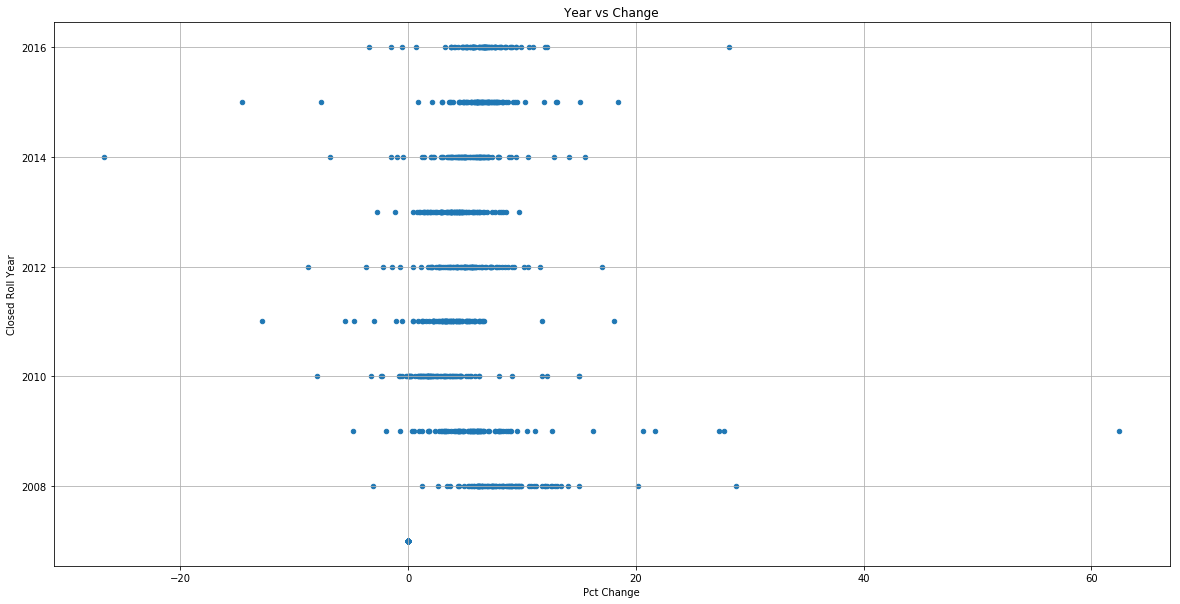

<Figure size 432x288 with 0 Axes>

In [42]:
N = 30
colors = np.random.rand(N)
 
# Create 
fig = plt.figure()
 
combined_df.plot(kind="scatter", x="Pct Change", y="Closed Roll Year",  grid=True, figsize=(20,10), title="Year vs Change")
plt.show()
plt.tight_layout()

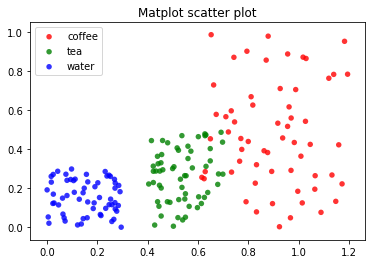

In [40]:
# Create data
import matplotlib.pyplot as plt
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))
 
data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
 
plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()